# Dyson brownian bridge

In addition to the classical Brownian motion bridge, we sort the eigenvalues at each time step.

## 1. Matrix model

In [15]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [16]:
class dyson_brownian_sampling:
    def __init__(self, n_traj, n_samples, tf):
        self.n_traj = n_traj
        self.n_samples = n_samples
        self.tf = tf
        self.dt = tf/n_samples
        self.B = np.empty((n_traj, n_samples), dtype=np.float32)
        self.dyson_brownian_motion = np.empty((self.n_traj, self.n_samples), dtype=np.float32)
        self.initialisation()
        self.generate()


    def initialisation(self):
        self.B[:, 0] = 0
        return self.B[:, 0]

    def generate(self):
        for i in range(self.n_samples - 1):
            t = i * self.dt
            Z = np.random.randn(self.n_traj) * np.sqrt(self.dt)
            self.B[:, i + 1] = self.B[:, i] + Z
        for i in range(n_samples):
            t = i * self.dt
            self.dyson_brownian_motion[:,i] = sorted(self.B[:, i] - (t * self.B[:, n_samples-1])/tf, reverse=True)
        return self.dyson_brownian_motion

    def plot(self):
        plt.figure(1, figsize=(14, 6))
        t = np.matlib.repmat(np.arange(0, self.tf, self.dt),self.n_traj,1)
        plt.plot(t.T, self.dyson_brownian_motion.T)
        plt.show()
        


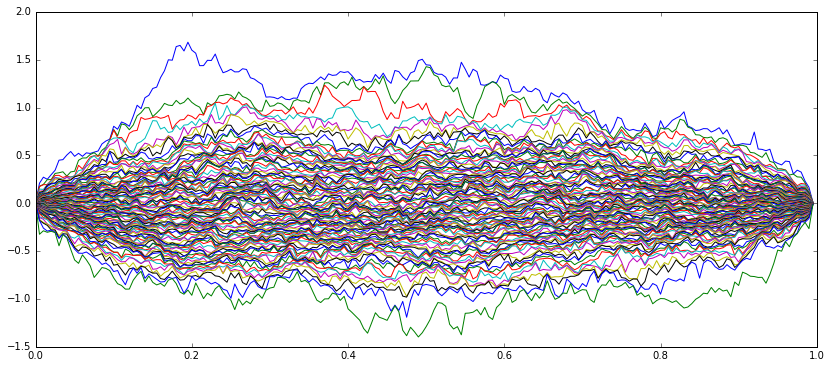

In [30]:
n_samples = 200
n_traj = 100
tf = 1
D_B = dyson_brownian_sampling(n_traj, n_samples, tf)
D_B.plot()

## 2. Semi-circular law

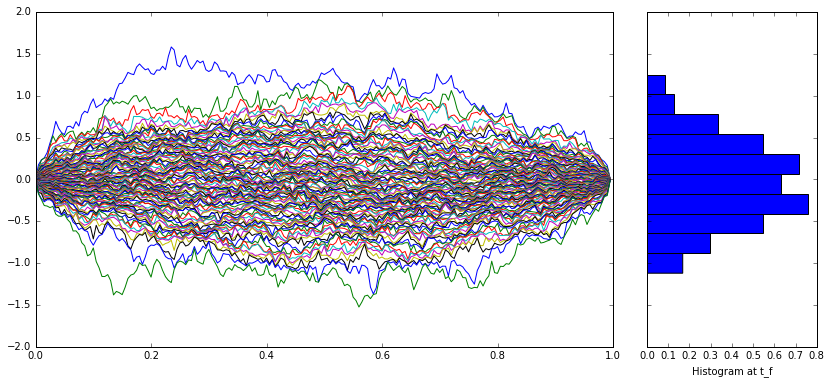

In [31]:
fig = plt.figure(1, figsize=(14, 6))
gs = GridSpec(1,4)
dpp_fig = fig.add_subplot(gs[0,0:3])
dpp_hist = fig.add_subplot(gs[0,3])

D_B_semi_circular = dyson_brownian_sampling(n_traj, n_samples, tf)

t = np.matlib.repmat(np.arange(0, D_B_semi_circular.tf, D_B_semi_circular.dt),D_B_semi_circular.n_traj,1)
dpp_fig.plot(t.T, D_B_semi_circular.dyson_brownian_motion.T)

t_demi = int((D_B_semi_circular.tf/2)*D_B_semi_circular.n_samples)

dpp_hist.hist(D_B_semi_circular.dyson_brownian_motion[:,t_demi], bins=10, normed=True, orientation='horizontal')

plt.setp(dpp_hist.get_yticklabels(), visible=False)
dpp_hist.set_xlabel('Histogram at t_f')
dpp_hist.set_ylim(dpp_fig.get_ylim())
plt.show()

In [29]:
t_demi

100